In [1]:
import prometheus_api_client as pac
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from datetime import timezone
from dateutil import tz
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
from numpy import arange
from matplotlib.ticker import FormatStrFormatter
from ipynb.fs.full.report import create_report
from ipynb.fs.full.metric_list import target_metric_list

In [2]:
today = datetime.utcnow().date()
start = datetime(today.year, today.month, today.day - 1)
end = datetime(today.year, today.month, today.day)

datetime.datetime(2020, 12, 14, 0, 0)

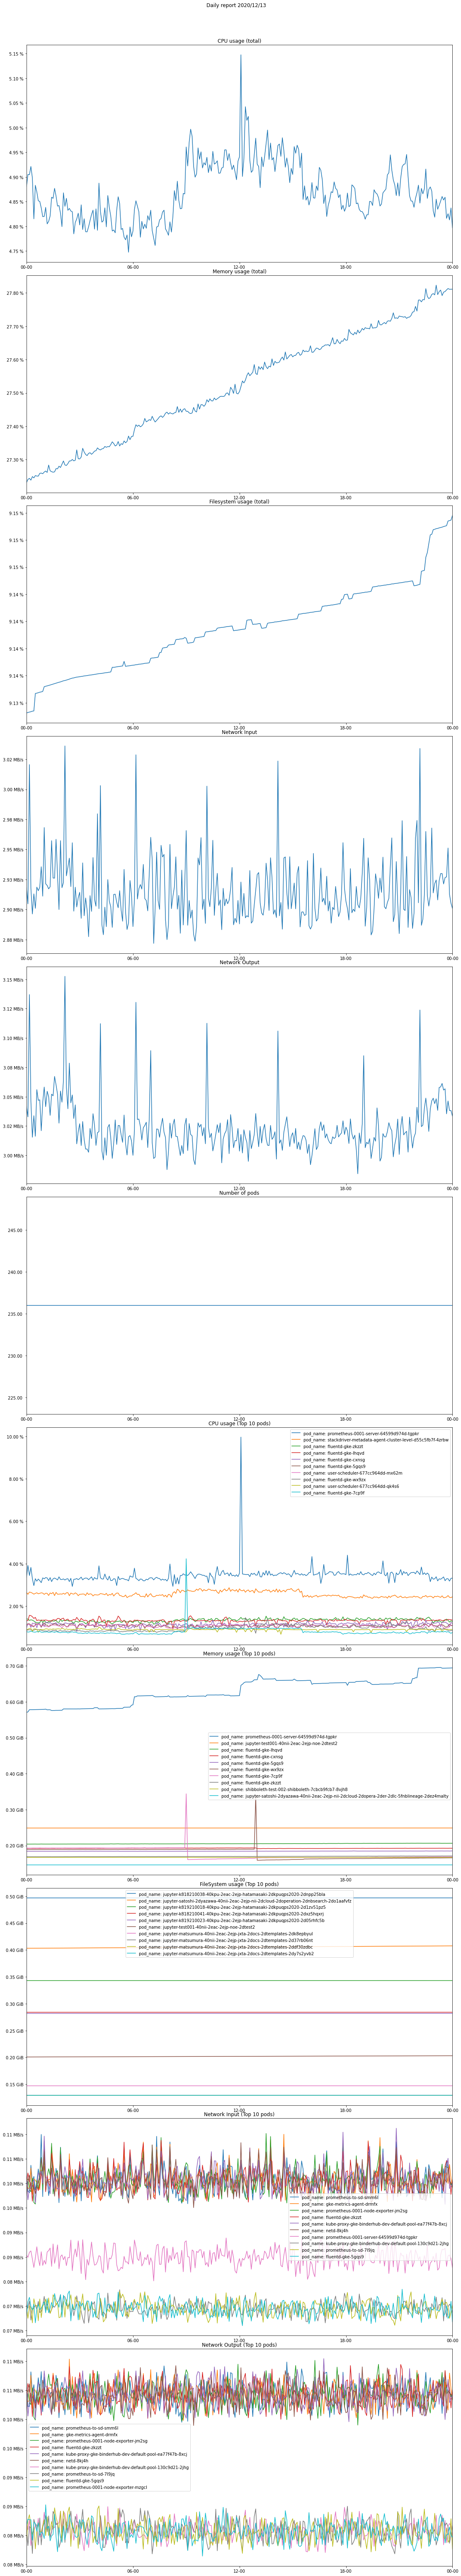

In [3]:
create_report(target_metric_list, 
              f'Daily report {start.strftime("%Y/%m/%d")}',
             start,
             end,
             step=300, # 5 minutes
             tick_locator=HourLocator(arange(0, 25, 6)),
             tick_label_formatter=DateFormatter('%H-%M'),
)